<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/ThM0SMR5/LOAN.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df= pd.read_csv('loan-train (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
pd.crosstab(df['Credit_History'],df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

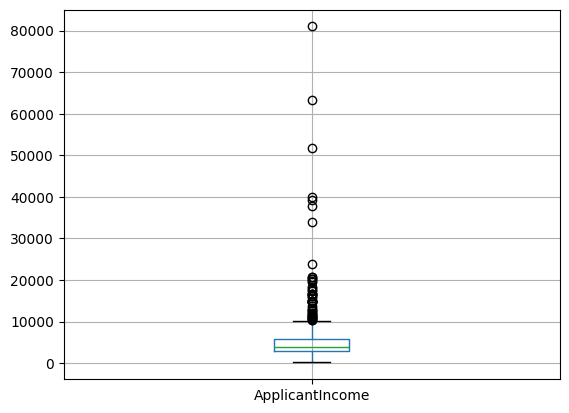

In [10]:
df.boxplot(column = 'ApplicantIncome')

<Axes: >

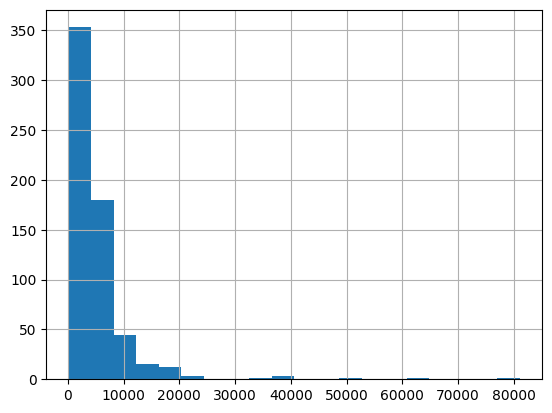

In [11]:
df['ApplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

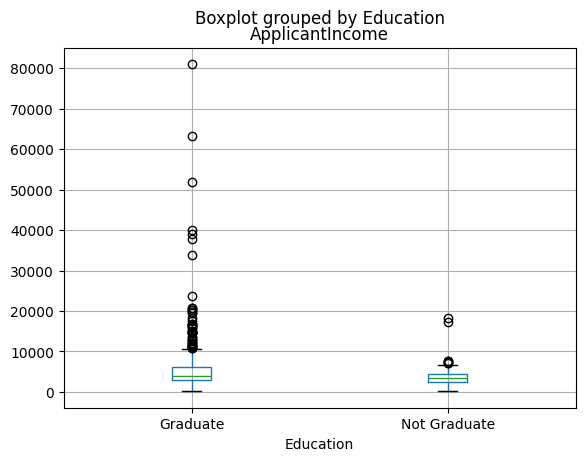

In [12]:
df.boxplot(column = 'ApplicantIncome', by = 'Education' )

<Axes: >

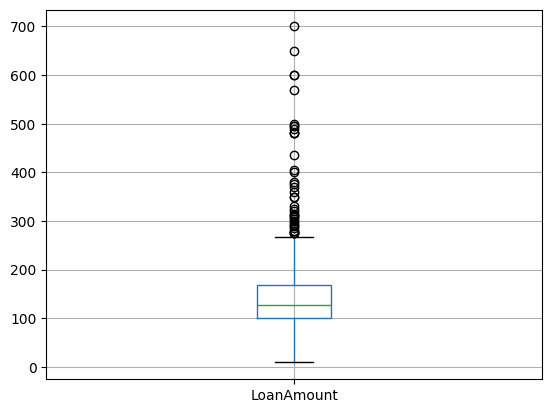

In [13]:
df.boxplot(column = 'LoanAmount')

<Axes: >

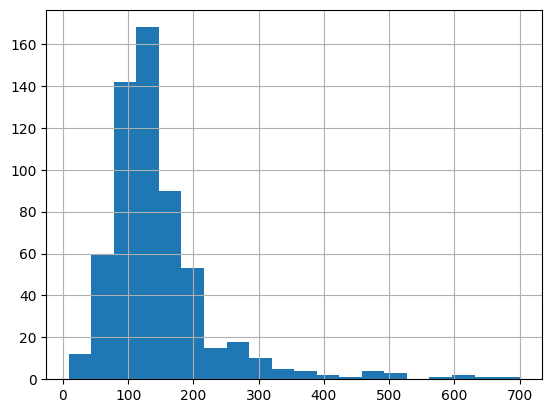

In [14]:
df['LoanAmount'].hist(bins=20)

<Axes: >

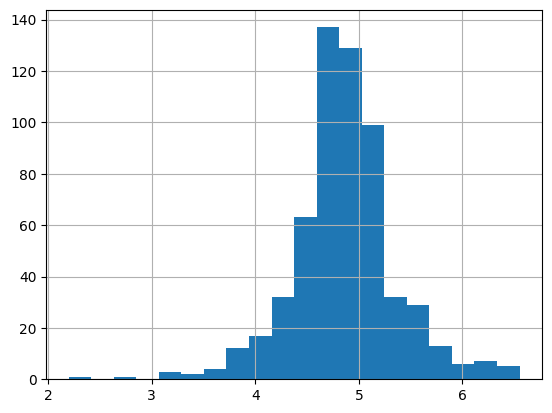

In [15]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [18]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<Axes: >

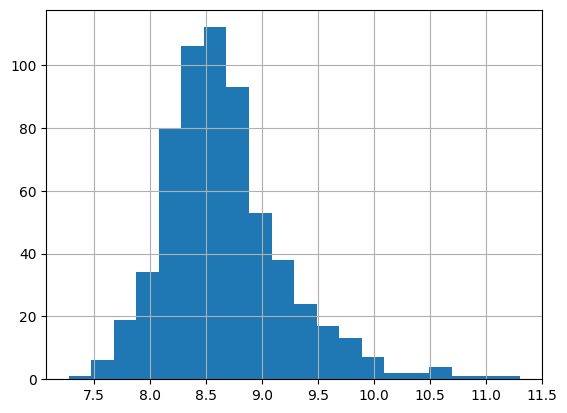

In [22]:
df['TotalIncome_log'].hist(bins=20)

In [23]:
print('per of missing gender is %2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


Number of people who take loan as group by gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

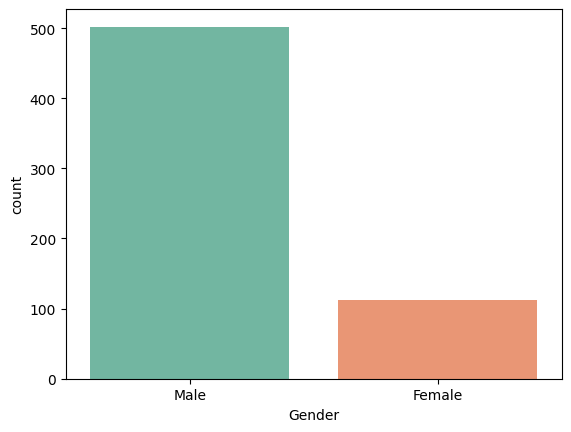

In [24]:
print('Number of people who take loan as group by gender: ')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data= df,palette = 'Set2')

Number of people who take loan as group by Martial status: 
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

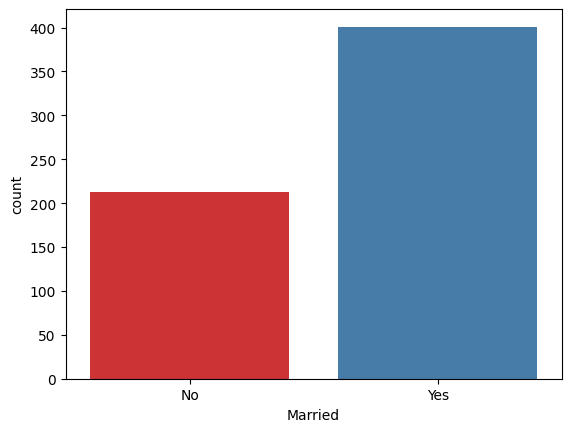

In [25]:
print('Number of people who take loan as group by Martial status: ')
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data= df,palette = 'Set1')

Number of people who take loan as group by Dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

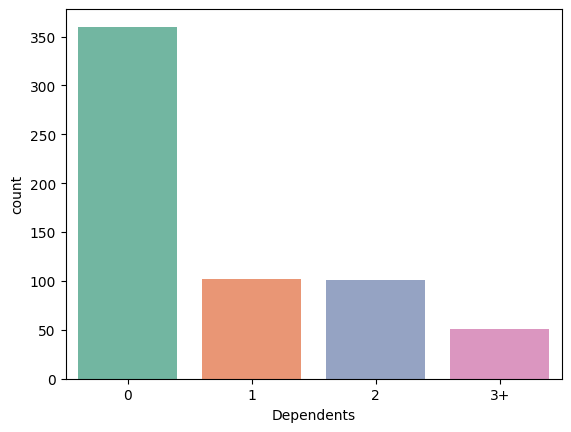

In [26]:
print('Number of people who take loan as group by Dependents: ')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents',data= df,palette = 'Set2')

Number of people who take loan as group by Property Area: 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

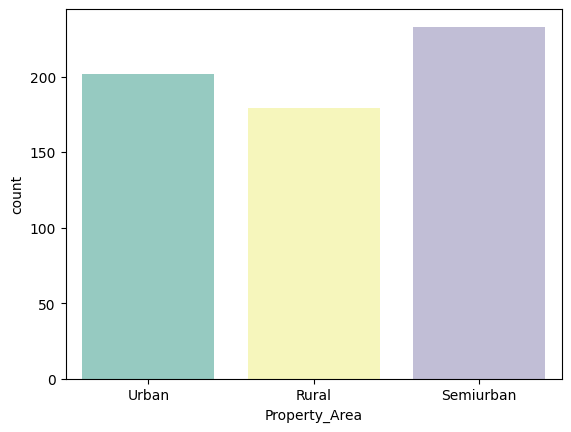

In [27]:
print('Number of people who take loan as group by Property Area: ')
print(df['Property_Area'].value_counts())
sns.countplot(x = 'Property_Area',data= df,palette = 'Set3')

Number of people who take loan as group by Self Employed: 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

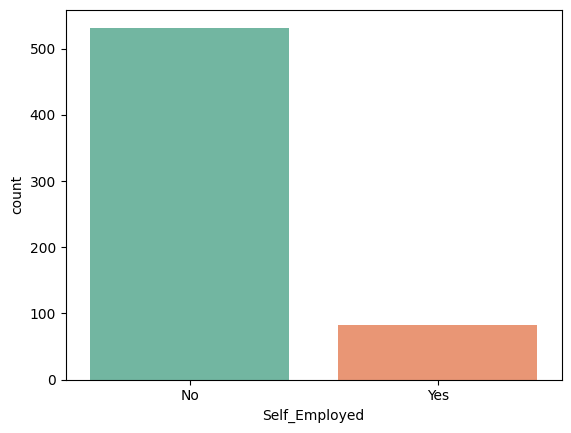

In [28]:
print('Number of people who take loan as group by Self Employed: ')
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed',data= df,palette = 'Set2')

Number of people who take loan as group by Loan Amount: 
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

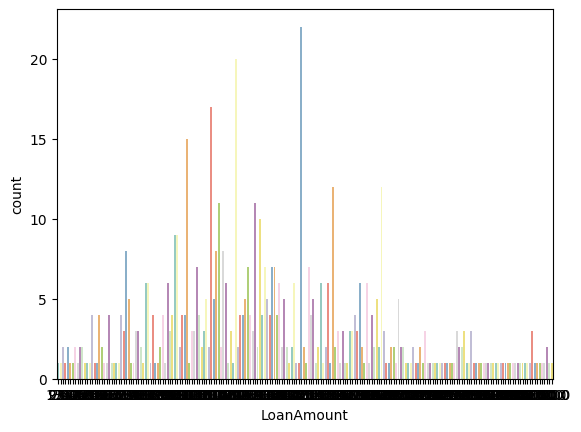

In [29]:
print('Number of people who take loan as group by Loan Amount: ')
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount',data= df,palette = 'Set3')

Number of people who take loan as group by Credit History: 
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

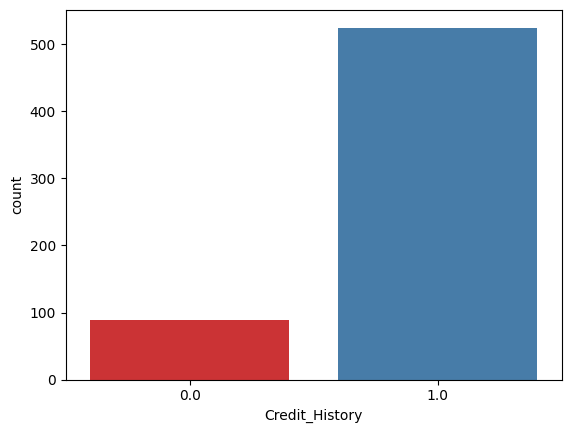

In [30]:
print('Number of people who take loan as group by Credit History: ')
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History',data= df,palette = 'Set1')

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


# Splitting the dataset in features and label
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

X

y

# Gender

In [32]:
df['Gender'].replace('Male',0, inplace=True)
df['Gender'].replace('Female',1, inplace=True)

# Married

In [33]:
df['Married'].replace('Yes',0, inplace=True)
df['Married'].replace('No',1, inplace=True)

# Education

In [34]:
df['Education'].replace('Graduate',0, inplace=True)
df['Education'].replace('Not Graduate',1, inplace=True)

# Self_Employed

In [35]:
df['Self_Employed'].replace('Yes',0, inplace=True)
df['Self_Employed'].replace('No',1, inplace=True)

# Dependents

In [36]:
df['Dependents'].replace('0',0, inplace=True)
df['Dependents'].replace('1',1, inplace=True)
df['Dependents'].replace('2',2, inplace=True)
df['Dependents'].replace('3+',3, inplace=True)

# Property_Area

In [37]:
df['Property_Area'].replace('Rural',0, inplace=True)
df['Property_Area'].replace('Urban',1, inplace=True)
df['Property_Area'].replace('Semiurban',2, inplace=True)

# Loan_Status

In [38]:
df['Loan_Status'].replace('Y',0, inplace=True)
df['Loan_Status'].replace('N',1, inplace=True)

# MODEL BUILDING

In [39]:
# Splitting the dataset in features and label
X = df.drop(['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount'], axis = 1)
y = df['Loan_Status']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 11)
X_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,0,1,0,0,1,360.0,1.0,1,4.857444,5849.0,8.674026
1,0,0,1,0,1,360.0,1.0,0,4.852030,6091.0,8.714568
2,0,0,0,0,0,360.0,1.0,1,4.189655,3000.0,8.006368
3,0,0,0,1,1,360.0,1.0,1,4.787492,4941.0,8.505323
4,0,1,0,0,1,360.0,1.0,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,360.0,1.0,0,4.262680,2900.0,7.972466
610,0,0,3,0,1,180.0,1.0,0,3.688879,4106.0,8.320205
611,0,0,1,0,1,360.0,1.0,1,5.533389,8312.0,9.025456
612,0,0,2,0,1,360.0,1.0,1,5.231109,7583.0,8.933664


In [43]:
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

# 1- DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [47]:
accuracy_dtc = metrics.accuracy_score(y_test, y_pred_dtc)

In [48]:
from sklearn import metrics
print('The accuracy of Decision Tree is: ', accuracy_dtc)

The accuracy of Decision Tree is:  0.7398373983739838


In [49]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy during Grid Search: ", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters found:  {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy during Grid Search:  0.7455163883735312


In [50]:
# Make predictions with the best estimator from grid search
best_dtc = grid_search.best_estimator_
y_pred_tuned = best_dtc.predict(X_test)

# Calculate the accuracy of the tuned model
accuracy_tuned = metrics.accuracy_score(y_test, y_pred_tuned)
print('The accuracy of the tuned Decision Tree is:', accuracy_tuned)


The accuracy of the tuned Decision Tree is: 0.6991869918699187


# 2- GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [53]:
y_pred_nbc  = nbc.predict(X_test)
y_pred_nbc 

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [54]:
accuracy_nbc = metrics.accuracy_score(y_test, y_pred_nbc)

In [55]:
from sklearn import metrics
print('The accuracy of GaussianNB  is: ', accuracy_nbc)

The accuracy of GaussianNB  is:  0.8373983739837398


# 3- RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [59]:
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)

In [60]:
from sklearn import metrics
print('The accuracy of RandomForestClassifier  is: ', accuracy_rfc)

The accuracy of RandomForestClassifier  is:  0.7967479674796748


In [61]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best parameters found: ', best_params)


Best parameters found:  {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [62]:
# Initialize the RandomForestClassifier with best parameters
rfc_tuned = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Fit the model
rfc_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred_rfc_tuned = rfc_tuned.predict(X_test)

# Calculate the accuracy
accuracy_rfc_tuned = metrics.accuracy_score(y_test, y_pred_rfc_tuned)
print('The accuracy of RandomForestClassifier after tuning is: ', accuracy_rfc_tuned)

The accuracy of RandomForestClassifier after tuning is:  0.8130081300813008


# 4- LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [66]:
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)

In [67]:
from sklearn import metrics
print('The accuracy of LogisticRegression  is: ', accuracy_lr)

The accuracy of LogisticRegression  is:  0.8292682926829268


# 5- SVC

In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [70]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)

In [72]:
from sklearn import metrics
print('The accuracy of SVC  is: ', accuracy_svc)

The accuracy of SVC  is:  0.7317073170731707


# 6- GradientBoostingClassifier

In [73]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred_gbc = gbc.predict(X_test)
y_pred_gbc

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [75]:
accuracy_gbc = metrics.accuracy_score(y_test, y_pred_gbc)

In [76]:
from sklearn import metrics
print('The accuracy of GradientBoostingClassifier  is: ', accuracy_gbc)

The accuracy of GradientBoostingClassifier  is:  0.8048780487804879


# Data Frame in one model

In [77]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'GaussianNB','RandomForestClassifier','LogisticRegression','SVC','GradientBoostingClassifier'],
    'Accuracy': [accuracy_tuned, accuracy_nbc, accuracy_rfc_tuned, accuracy_lr, accuracy_svc, accuracy_gbc]
})

# Sort the DataFrame by accuracy in ascending order
results.sort_values(by = 'Accuracy', ascending = False)



,Model,Accuracy
1,GaussianNB,0.837398
3,LogisticRegression,0.829268
2,RandomForestClassifier,0.813008
5,GradientBoostingClassifier,0.804878
4,SVC,0.731707
0,DecisionTreeClassifier,0.699187


# LOC ROWS

In [85]:
df.loc[613:613:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
613,LP002990,1,1,0,0,0,4583,0.0,133.0,360.0,0.0,2,1,4.890349,4583.0,8.430109


# Making a Predictive System

In [79]:
input_data = (0, 1, 0, 0, 1, 360.0, 1.0, 1, 4.912655, 5316.0, 8.578476)
              
# changing the input_data to numpy array
array_input = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input = array_input.reshape(1, -1)

# Use the model to make predictions
prediction = nbc.predict(reshaped_input)
print(prediction)

if prediction[0] == 0:
    print('The person can get a Loan')
else:
    print('The person does not get a Loan')

[0]
The person can get a Loan


# Saving the trained model

In [80]:
import pickle

In [81]:
filename = 'Loan_Approval.sav'
pickle.dump(nbc, open(filename, 'wb'))

In [82]:
# loading the saved model
loaded_model = pickle.load(open('Loan_Approval.sav', 'rb'))

In [83]:
input_data = (0, 1, 0, 0, 1, 360.0, 1.0, 1, 4.912655, 5316.0, 8.578476)
              
# changing the input_data to numpy array
array_input  = np.array(input_data)


# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if prediction[0] == 0:
    print('The person can get a Loan')
else:
    print('The person does not get a Loan')

[0]
The person can get a Loan


In [84]:
for column in X.columns:
  print(column)

Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Credit_History
Property_Area
LoanAmount_log
TotalIncome
TotalIncome_log


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
